In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
dat = pd.read_csv('/Users/dj/Documents/GitHub/project-neurocloud/data/happiness/sat_gdp.csv', index_col= 0)

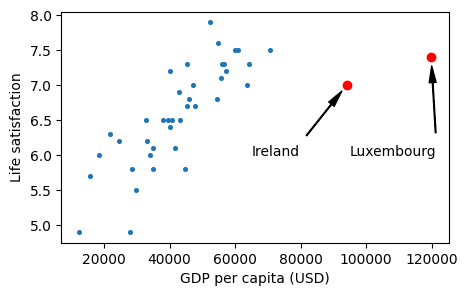

In [3]:
position_text = {"Ireland": (90000, 6.5), "Luxembourg": (11000, 7.0)}

# Creating function for getting plots
def get_figure(x, y, data_frame):

    fig, ax = plt.subplots(1, figsize=(5, 3))
    ax.scatter(x, y, s=7)

    ax.set_xlabel("GDP per capita (USD)")
    ax.set_ylabel("Life satisfaction")
    return fig, ax


# Display Data
X = np.array(dat.GDP)
y = np.array(dat.Satisfaction)

fig, ax = get_figure(X, y, dat)

position_text = {"Ireland": (65000, 6.0), "Luxembourg": (95000, 6.0)}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = (
        float(dat[dat["Country"] == country]["GDP"]),
        float(dat[dat["Country"] == country]["Satisfaction"]),
    )
    country = "U.S." if country == "United States" else country
    plt.annotate(
        country,
        xy=(pos_data_x, pos_data_y),
        xytext=pos_text,
        arrowprops=dict(facecolor="black", width=0.5, shrink=0.1, headwidth=5),
    )
    plt.plot(pos_data_x, pos_data_y, "ro")

## Ridge Regression

In [4]:
from sklearn.linear_model import Ridge

x_fit = np.linspace(min(X), max(X), 41)

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X.reshape(-1, 1), y.reshape(-1, 1))

Ridge(alpha=1, random_state=42, solver='cholesky')

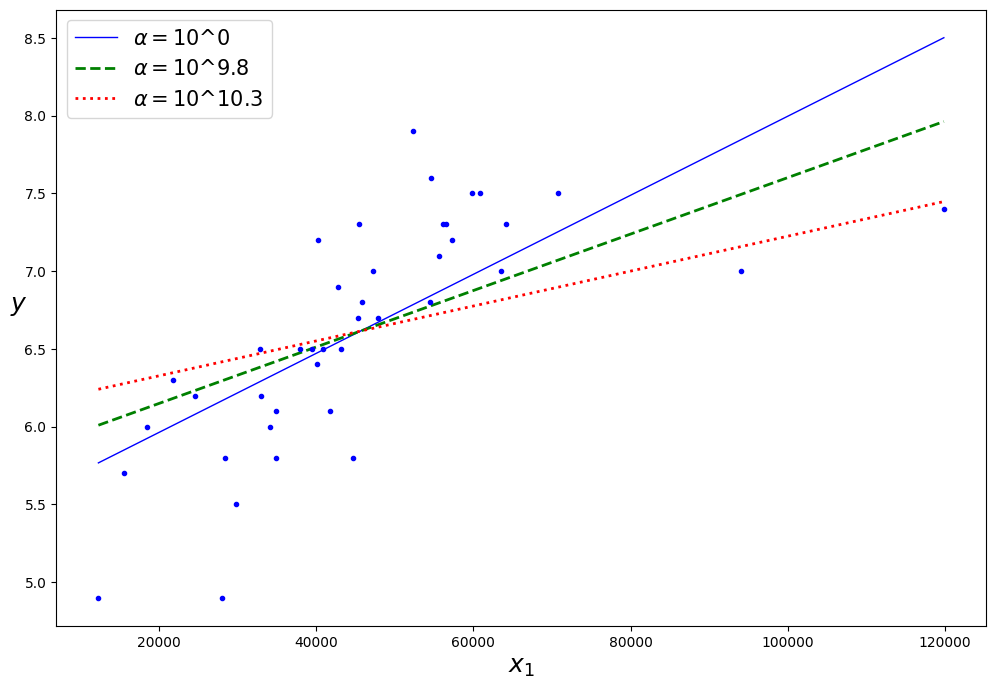

In [5]:
def plot_model(model_class, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(10**alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
        y_new_regul = model.predict(x_fit.reshape(-1, 1))
        lw = 2 if alpha > 0 else 1
        plt.plot(x_fit, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$" + '10^' + f'{alpha}')
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)

plt.figure(figsize=(12,8))
plot_model(Ridge, alphas=(0, 9.8,10.3), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)


plt.show()

## Lasso Regression

In [6]:
from sklearn.linear_model import Lasso

x_fit = np.linspace(min(X), max(X), 41)

lasso_reg = Lasso(alpha=1, random_state=42)
lasso_reg.fit(X.reshape(-1, 1), y.reshape(-1, 1))

Lasso(alpha=1, random_state=42)

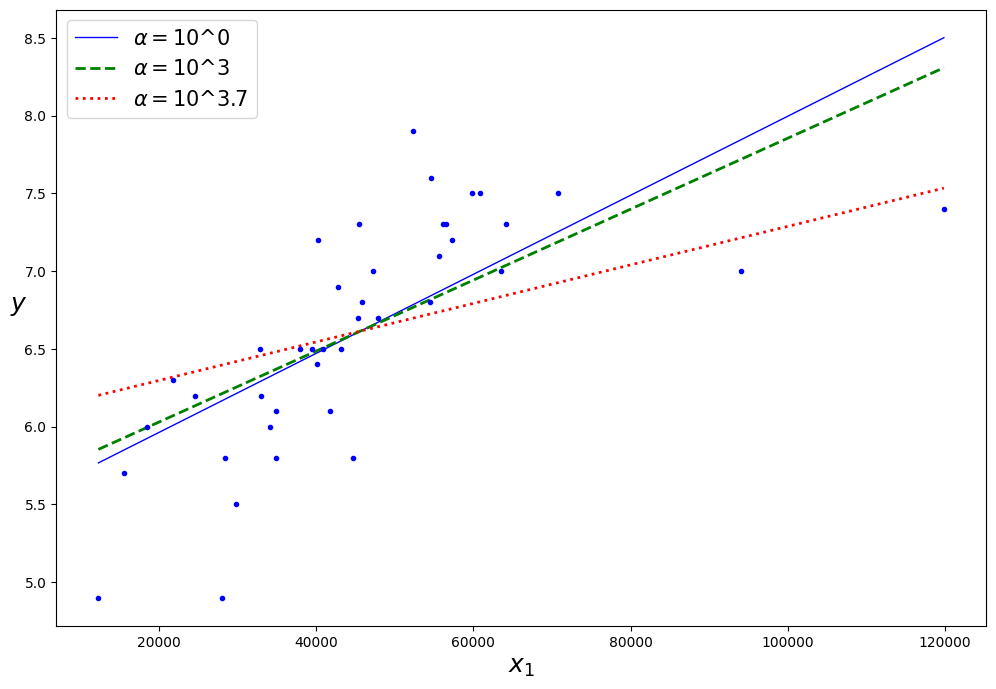

In [7]:
plt.figure(figsize=(12,8))
plot_model(Lasso, alphas=(0, 3, 3.7), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.show()

# Polynomial Regression regularised

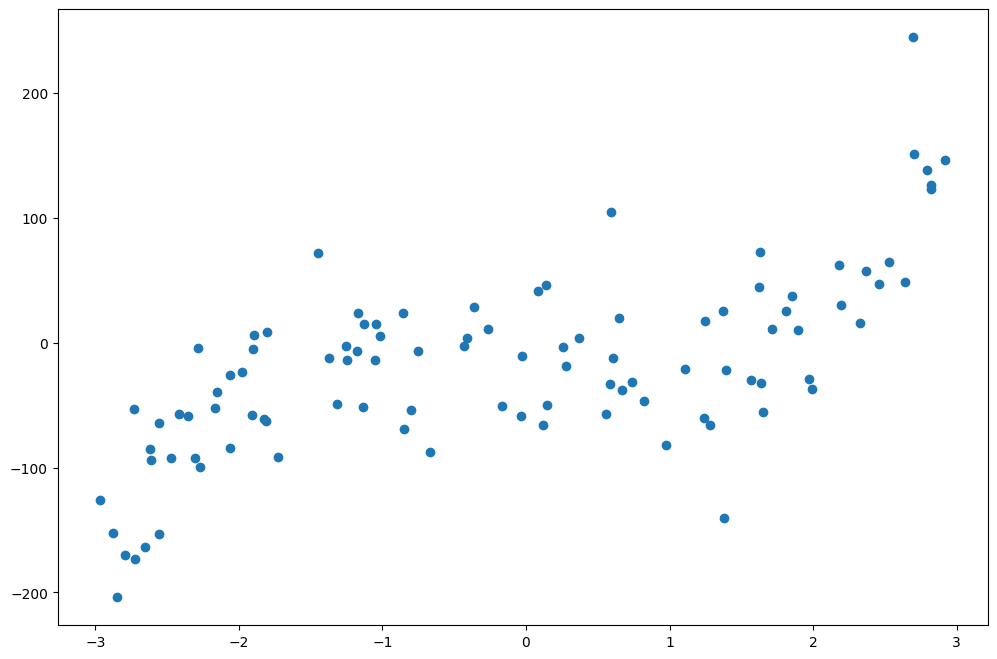

In [52]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (X ** 5) + (X ** 4) - 2 * (X ** 3) - 10 * (X ** 2) + (3 * X) + np.random.randn(m, 1) + np.random.normal(0,40,m).reshape(m,1)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

plt.figure(figsize=(12,8))
plt.scatter(X, y)
plt.show()

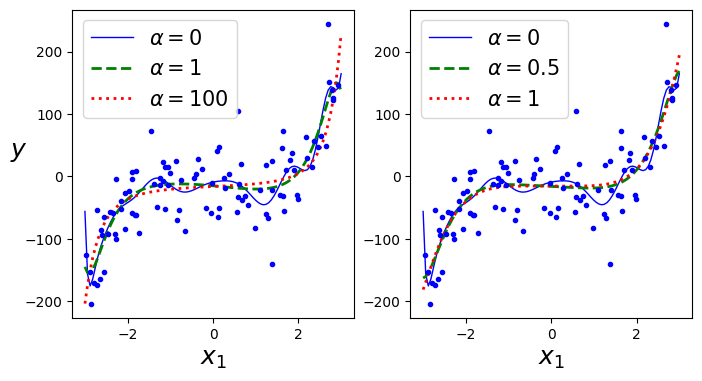

In [57]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

np.random.seed(42)


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=17, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    # plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=True, alphas=(0, 1, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 0.5, 1), random_state=42)

plt.show()